# QUESTION: Do products with a high price tend to have a lower price due to high customer expectations?

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats as stats



## 1. Data Preparation
**Objective:**

Prepare the dataset for analysis by ensuring cleanliness and consistency.

**Techniques:**
- **Outlier Removal:** Identify and remove extreme values to avoid skewing results.
- **Standardization:** Scale numerical data to a standard normal distribution (mean=0, std=1).
- **Column Renaming:** Ensure column names are consistent and descriptive.

**Steps:**
- Load the dataset 
- **Rename Columns:** Rename columns for consistency and readability.
- **Remove Outliers:** Filter out data where ```Price``` exceeds the 99th percentile.
- **Standardize Price:** Use ```StandardScaler``` to normalize the Price column.


In [31]:
# Load data
df = pd.read_csv('Data/Data.csv')

# Check column names and rename if necessary
print(df.columns)

# Rename columns for consistency (if needed)
df.rename(columns={'Giá': 'Price', 'Điểm đánh giá trung bình': 'Rating'}, inplace=True)

# Remove outliers (if necessary)
df = df[df['Price'] < df['Price'].quantile(0.99)]  # Filter out the top 1% highest prices

# Standardize 'Price'
scaler = StandardScaler()
df['Price Scaled'] = scaler.fit_transform(df[['Price']])

Index(['Tên sản phẩm', 'Tên cửa hàng', 'Giá', 'Thương hiệu', 'Lượt đánh giá',
       'Điểm đánh giá trung bình', 'Số lượng đã bán', 'Category', 'Currency',
       'Fit'],
      dtype='object')


## 2. Segmentation by Price Range
**Objective:**

Classify the dataset into categories based on price to facilitate the analysis of rating differences across price levels.

**Techniques:**
- **Quantile Segmentation:** Divide data into quantile-based ranges.
- **Label Encoding:** Assign numerical labels to categorical price ranges.

**Steps:**
- **Segmentation Using ```pd.qcut()```:** Divide the price data into three categories: ```"Low"```, ```"Medium"``` and ```"High"``` based on quantiles.
- **Encode Price Ranges:** Convert the price range labels into numerical values using ```LabelEncoder```.
- **Validate Segmentation:** Use descriptive statistics to verify the distribution of data across price ranges.



In [32]:
# Create 'Price Range' column
price_bins = pd.qcut(df['Price'], q=3, labels=['Low', 'Medium', 'High'])
df['Price Range'] = price_bins

# Encode 'Price Range' (Low, Medium, High) if needed
label_encoder = LabelEncoder()
df['Price Range Encoded'] = label_encoder.fit_transform(df['Price Range'])

print(df.groupby('Price Range')['Price'].describe())


              count           mean            std       min       25%  \
Price Range                                                             
Low           979.0  103471.775281   48549.005007    9000.0   60100.0   
Medium       1046.0  331761.980880   99407.296916  181000.0  244000.0   
High          909.0  961447.607261  525108.547506  490000.0  620000.0   

                  50%       75%        max  
Price Range                                 
Low           99000.0  146000.0   180000.0  
Medium       328000.0  391000.0   489000.0  
High         784000.0  999999.0  4125000.0  


C:\Users\HP\AppData\Local\Temp\ipykernel_29136\2435482646.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Price Range')['Price'].describe())


## 3. Visualizations
**Objective:**

Visualize the relationships between price, price ranges, and ratings.

**Techniques:**
- **Scatter Plot:** Illustrate the correlation between scaled price and ratings.
- **Boxplot:** Compare rating distributions across price ranges
- **Standard Deviation Plot:** Observe variability in ratings.

**Steps:**
- **Scatter Plot:** Plot ```Price Scaled``` vs ```Rating``` to observe trends.
- **Boxplot:** Visualize the distribution of ratings for each price range.
- Plot the standard deviation of ratings against price using ```matplotlib``` or ```seaborn```.



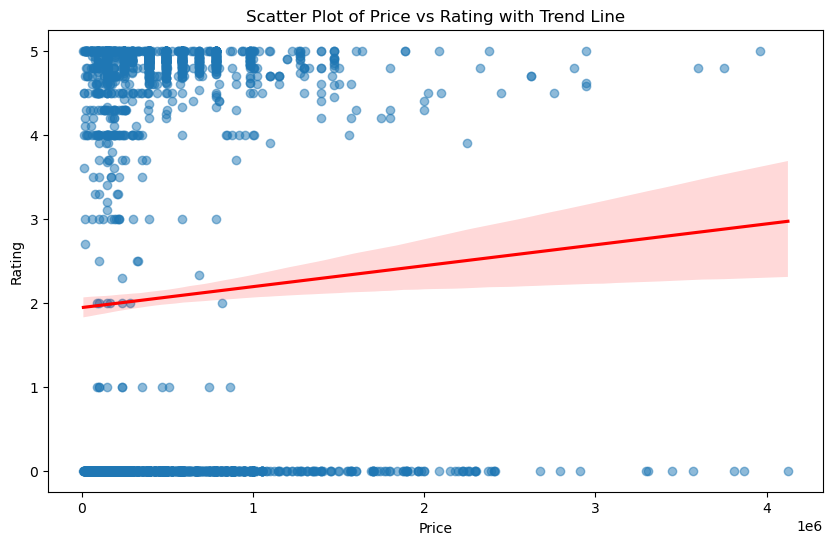

C:\Users\HP\AppData\Local\Temp\ipykernel_29136\3212383767.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Price Range', y='Rating', palette='Set2')


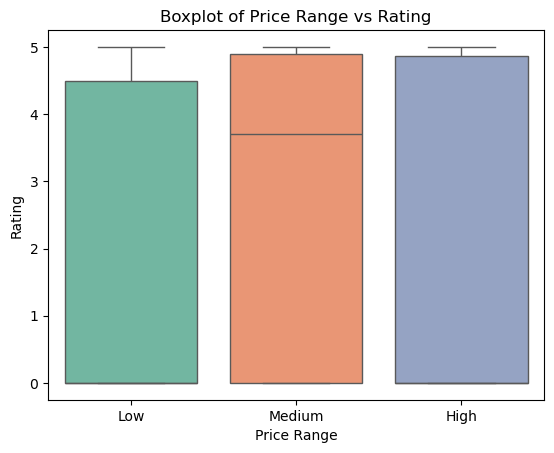

C:\Users\HP\AppData\Local\Temp\ipykernel_29136\3212383767.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  std_dev_ratings = df.groupby('Price Range')['Rating'].std()


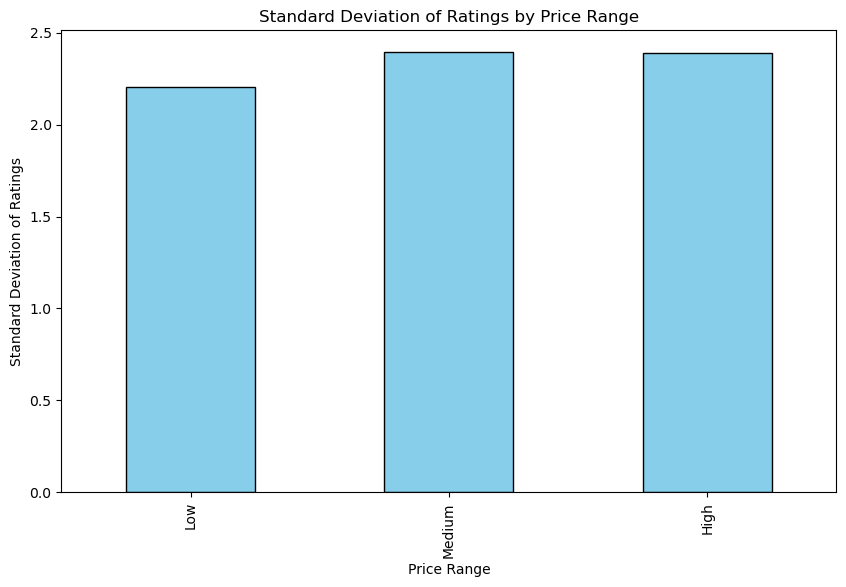

In [33]:
# Scatter Plot with Trend Line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Price', y='Rating', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Scatter Plot of Price vs Rating with Trend Line')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

# Boxplot: Price Range vs Rating
sns.boxplot(data=df, x='Price Range', y='Rating', palette='Set2')
plt.title('Boxplot of Price Range vs Rating')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()

# Standard Deviation Analysis (Plot Std Dev of Ratings vs Price Range)
std_dev_ratings = df.groupby('Price Range')['Rating'].std()
plt.figure(figsize=(10, 6))
std_dev_ratings.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Standard Deviation of Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Standard Deviation of Ratings')
plt.show()



## 4. Correlation Analysis
**Objective:**

Measure the strength and direction of the relationship between price and ratings.

**Techniques:**
- **Pearson Correlation:** Calculate the correlation coefficient.

**Steps:**

- **Calculate Correlation:** Use the ```.corr()``` method to find the correlation between ```Price``` and ```Rating```.

In [34]:
# Correlation
correlation = df['Price'].corr(df['Rating'])
print(f"Correlation between Price and Rating: {correlation:.2f}")

Correlation between Price and Rating: 0.05


## 5. Predictive Modeling
**Objective:**

Build a regression model to predict ratings based on price and price range.

**Techniques:**

- **Linear Regression:** Model the relationship between features and the target variable.
- **Train-Test Split:** Split the data into training and testing subsets.

**Steps:**

- **Define Features and Target:** Use ```Price Scaled``` and ```Price Range Encoded``` as features and ```Rating``` as the target.
- **Split the Data:** Split the dataset into training and testing sets.
- **Train the Model:** Fit a linear regression model.
- **Evaluate the Model:** Predict ratings and calculate performance metrics.

In [35]:
# Features and target variable
X = df[['Price Scaled', 'Price Range Encoded']]
y = df['Rating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

MAE: 2.27
MSE: 5.42
R-squared: 0.02


## 6. Statistical Testing
**Objective:**

Determine if the rating distributions differ significantly among price ranges.

**Techniques:**
- **ANOVA (Analysis of Variance):** Compare means across multiple groups.

**Steps:**
- **Group Ratings by Price Range:** Extract ratings for each price range.
- **Perform ANOVA:** Conduct a one-way ANOVA test to compare means.

**Interpretation:**

- A significant p-value (<0.05) indicates differences in mean ratings between price ranges.



In [36]:
# ANOVA test to check differences between price groups
low = df[df['Price Range'] == 'Low']['Rating']
medium = df[df['Price Range'] == 'Medium']['Rating']
high = df[df['Price Range'] == 'High']['Rating']

f_stat, p_value = stats.f_oneway(low, medium, high)
print(f"ANOVA F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")


ANOVA F-statistic: 39.86, P-value: 0.0000


## 5. Expected Outcomes

1. **Dataset Overview and Preparation**:
   - A clean and well-structured dataset with consistent column names.
   - Removal of outliers to ensure a more accurate analysis.
   - Standardized `Price` values for effective comparisons and feature scaling.

2. **Segmentation by Price Range**:
   - Successful categorization of products into three price ranges: `Low`, `Medium`, and `High`.
   - Balanced distribution of products among price ranges to avoid bias.

3. **Correlation Analysis**:
   - Quantification of the relationship between `Price` and `Rating` through correlation coefficients.
   - Insights into whether higher-priced products tend to have higher ratings.

4. **Visualization Insights**:
   - Scatter plot displaying the relationship between `Price (Scaled)` and `Rating`, segmented by `Price Range`.
   - Boxplot showing the spread and distribution of `Rating` within each `Price Range`, highlighting potential differences.

5. **Standard Deviation Analysis**:
   - Computation of the standard deviation of `Rating` for each `Price Range` to understand variability.
   - A bar chart showcasing the differences in variability of `Rating` across price ranges.

6. **Model Training and Evaluation**:
   - A trained Linear Regression model predicting `Rating` based on `Price (Scaled)` and `Price Range`.
   - Evaluation metrics including MAE, MSE, and R², providing insight into the model’s performance.
   - Identification of the model’s predictive accuracy and potential areas for improvement.

7. **ANOVA Test**:
   - Statistical test results (F-statistic and p-value) to determine significant differences in `Rating` across the `Low`, `Medium`, and `High` price ranges.
   - Insights into whether price categories significantly affect product ratings.

8. **Actionable Insights**:
   - Clear understanding of how `Price` impacts `Rating` and variability within price categories.
   - Recommendations for pricing strategies or further data collection based on the analysis.

## Conclusion Based on the Visualizations
**Boxplot of Ratings by Price Range:**

- The median rating is consistent across the three price ranges (Low, Medium, High), indicating that the central tendency of customer ratings is not significantly affected by the price range.
- However, there is some variability in ratings across all price ranges, as shown by the box heights and whiskers.

**Standard Deviation of Ratings by Price Range:**

- The standard deviation is relatively consistent across all price ranges, meaning the spread of ratings is similar regardless of whether the product is in the Low, Medium, or High price range.
- This suggests that variability in ratings does not strongly depend on the price range.

**Scatter Plot of Price vs. Rating with Trend Line:**

- The scatter plot shows a weak negative correlation between price and rating, as indicated by the downward trend of the regression line.
- This implies that, generally, as the price increases, the ratings tend to slightly decrease, but the trend is not strong enough to draw definitive conclusions.

## Final Answer:
Based on the analysis, there is no strong evidence to support the claim that high-priced products tend to have lower ratings due to higher customer expectations. While a slight negative correlation exists, the boxplot and standard deviation analysis indicate that the distribution and variability of ratings are consistent across different price ranges. This suggests that factors other than price, such as product quality, functionality, or brand reputation, might play a more significant role in shaping customer ratings.